<a href="https://colab.research.google.com/github/gizembakan/Data-Science-Bike-Store-Sales/blob/main/bike_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U --no-cache-dir gdown --pre


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=098994601751f3b1c6aa14a1ffc1358d29210e1ae88434f0e89d36ac5aeb15e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zyzpo3u/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
pip install --upgrade --no-cache-dir gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade --no-cache-dir gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline

**Loading the Data**

In [ ]:
! gdown --id 1Lqmsinlz-vX2ChYj4I8KTUQ0MpewkZqZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Lqmsinlz-vX2ChYj4I8KTUQ0MpewkZqZ
To: /content/sales_data.csv
100% 15.1M/15.1M [00:00<00:00, 74.8MB/s]


In [ ]:
!head data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [ ]:
sales = pd.read_csv('data/sales_data.csv',parse_dates=['Date'])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [ ]:
sales.shape

(31787, 18)

In [ ]:
sales.info() #Properties of the data we are working on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31787 entries, 0 to 31786
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              31787 non-null  datetime64[ns]
 1   Day               31787 non-null  int64         
 2   Month             31787 non-null  object        
 3   Year              31787 non-null  int64         
 4   Customer_Age      31787 non-null  int64         
 5   Age_Group         31786 non-null  object        
 6   Customer_Gender   31786 non-null  object        
 7   Country           31786 non-null  object        
 8   State             31786 non-null  object        
 9   Product_Category  31786 non-null  object        
 10  Sub_Category      31786 non-null  object        
 11  Product           31786 non-null  object        
 12  Order_Quantity    31786 non-null  float64       
 13  Unit_Cost         31786 non-null  float64       
 14  Unit_Price        3178

In [ ]:
sales.describe() # Statistical properties of the dataframe. To built the understanding.

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,31787.000000,31787.000000,31787.000000,31786.000000,31786.000000,31786.000000,31786.000000,31786.000000,31786.000000
mean,15.567842,2014.576210,36.117249,14.958944,6.634241,16.413641,104.453218,86.511515,190.964733
std,8.818836,1.115437,11.046930,8.718587,8.917699,24.170548,143.155602,97.172296,234.889964
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,-5.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,7.000000,2.000000,5.000000,24.000000,27.000000,59.000000
50%,15.000000,2014.000000,35.000000,15.000000,4.000000,9.000000,55.000000,54.000000,117.000000
75%,23.000000,2016.000000,43.000000,22.000000,8.000000,22.000000,123.000000,118.000000,221.000000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


**Numerical analysis and visualization**

In [ ]:
sales['Unit_Cost'].describe() 

count    31786.000000
mean         6.634241
std          8.917699
min          2.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

6.634241489964135

In [ ]:
sales['Unit_Cost'].median()

4.0

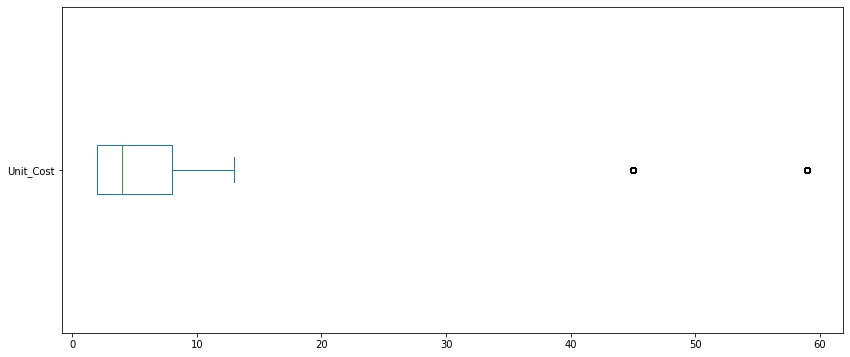

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

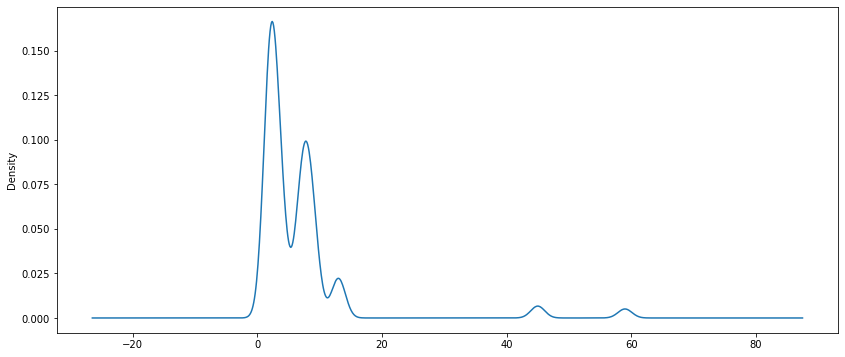

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

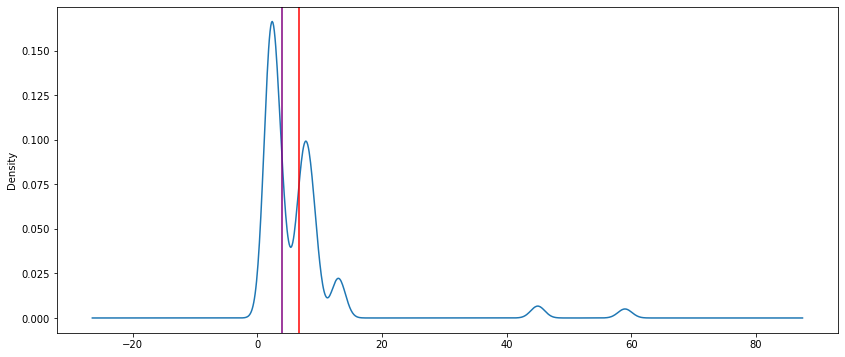

In [ ]:
ax=sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='purple')


Text(0, 0.5, 'Dollars')

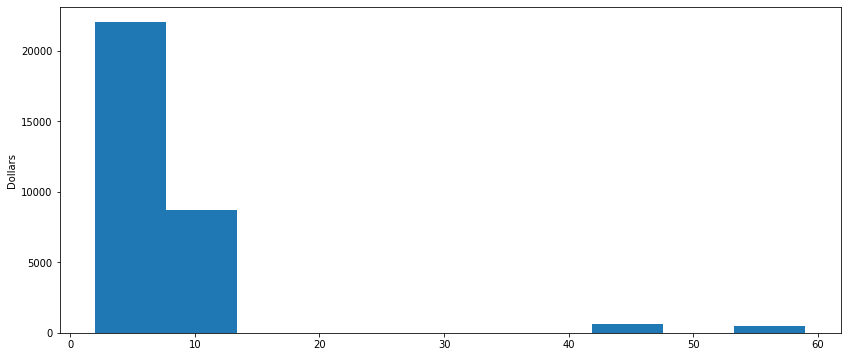

In [ ]:
ax= sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_ylabel('Dollars')

**Categorical analysis and visualization**

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [ ]:
sales['Age_Group'].value_counts()

Adults (35-64)          16024
Young Adults (25-34)    10660
Youth (<25)              4906
Seniors (64+)             196
Name: Age_Group, dtype: int64

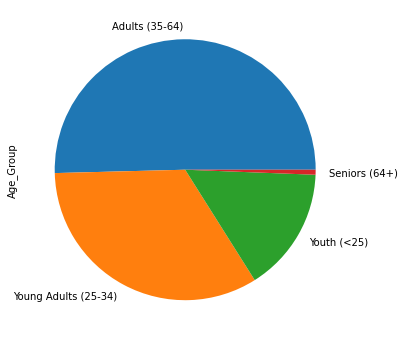

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of sales')

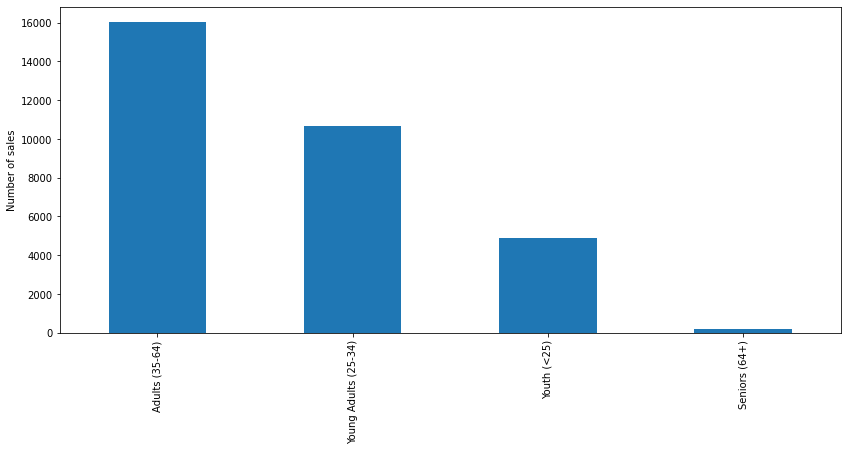

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of sales')

**Relationship between the columns**

In [ ]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.002151,-0.018286,-0.005848,0.012750,0.012456,0.007728,0.007333,0.007743
Year,-0.002151,1.000000,0.019906,-0.027991,-0.014624,-0.015466,-0.025775,-0.028147,-0.027353
Customer_Age,-0.018286,0.019906,1.000000,0.001483,0.024681,0.027963,0.047002,0.033729,0.042599
Order_Quantity,-0.005848,-0.027991,0.001483,1.000000,-0.163732,-0.165186,0.315624,0.407931,0.361118
Unit_Cost,0.012750,-0.014624,0.024681,-0.163732,1.000000,0.990183,0.601350,0.621619,0.623657
Unit_Price,0.012456,-0.015466,0.027963,-0.165186,0.990183,1.000000,0.632052,0.605766,0.635810
Profit,0.007728,-0.025775,0.047002,0.315624,0.601350,0.632052,1.000000,0.907115,0.984725
Cost,0.007333,-0.028147,0.033729,0.407931,0.621619,0.605766,0.907115,1.000000,0.966541
Revenue,0.007743,-0.027353,0.042599,0.361118,0.623657,0.635810,0.984725,0.966541,1.000000


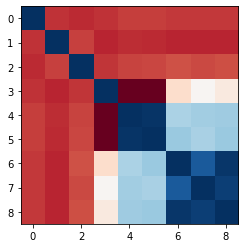

In [32]:
fig = plt.figure.Figure(figsize = (14,6))
plt.pyplot.imshow(corr, cmap='RdBu')

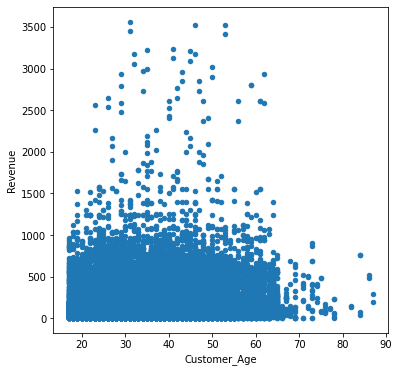

In [33]:
sales.plot(kind = 'scatter', x='Customer_Age', y= 'Revenue', figsize=(6,6))

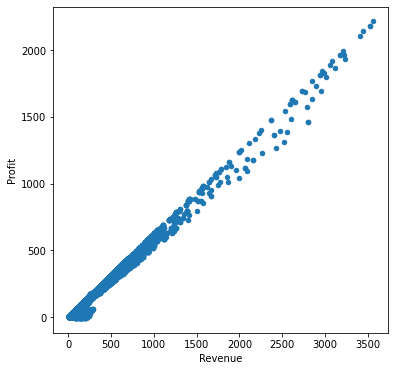

In [35]:
sales.plot(kind = 'scatter', x='Revenue', y='Profit', figsize = (6,6)) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Profit')

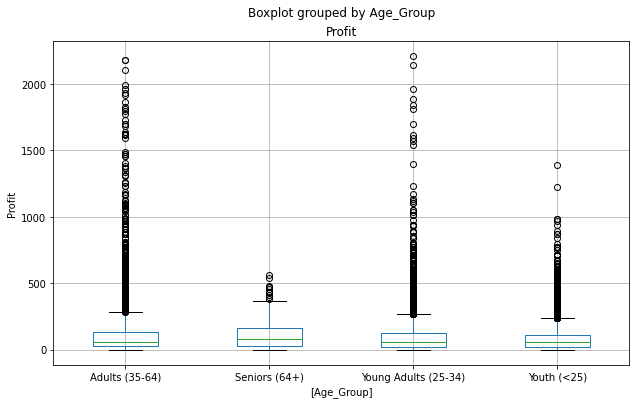

In [38]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

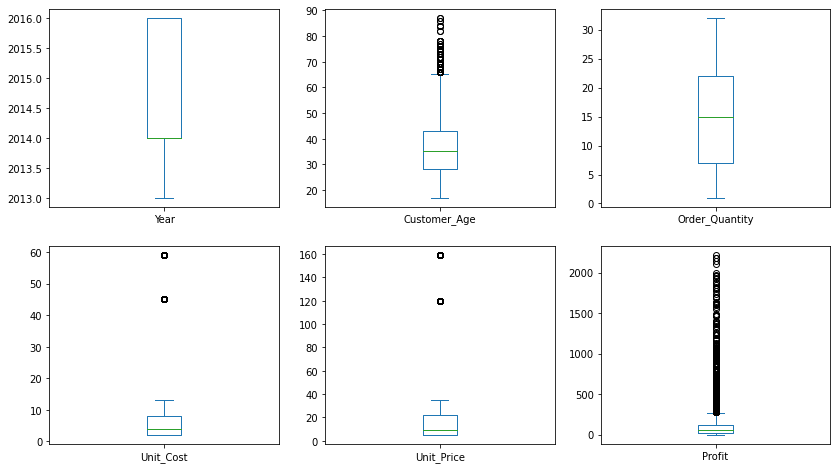

In [40]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

**Column Wrangling**

**Add and calculate a new Revenue_per_Age column**

In [41]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [42]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

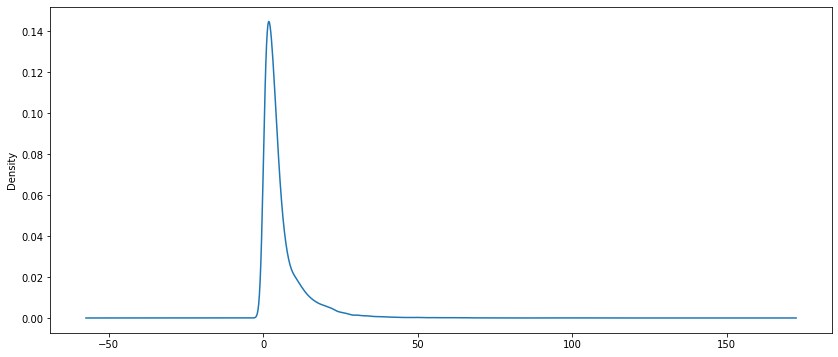

In [43]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

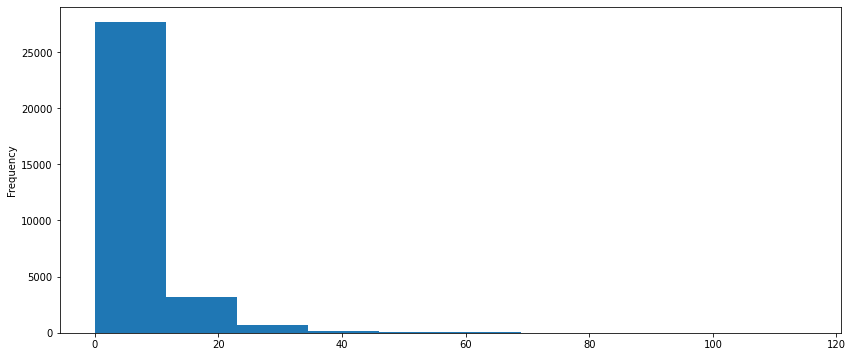

In [44]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

**Add and calculate a new Calculated_Cost column**

In [79]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360.0
1     360.0
2    1035.0
3     900.0
4     180.0
Name: Calculated_Cost, dtype: float64

In [46]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

1

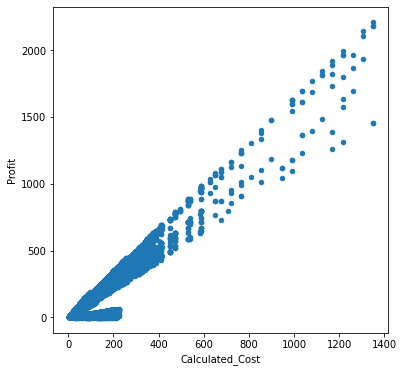

In [53]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

**Add and calculate a new Calculated_Revenue column**

In [54]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950.0
1     950.0
2    2401.0
3    2088.0
4     418.0
Name: Calculated_Revenue, dtype: float64

In [55]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

1

In [56]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,49.000000,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,42.612245,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,8.893617,180.0,418.0


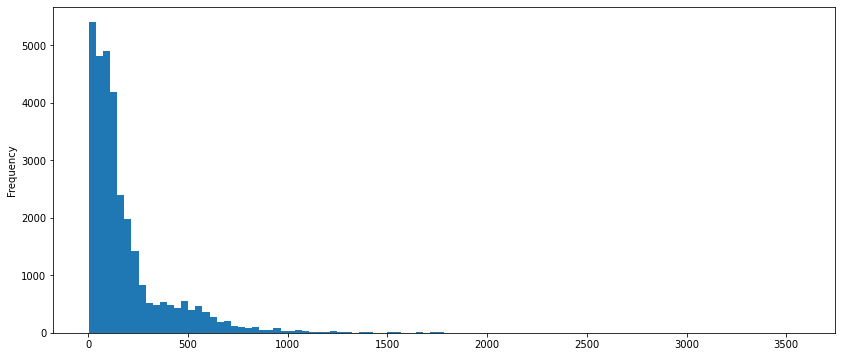

In [58]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

**Modify all Unit_Price values adding 3% tax to them**

In [59]:
sales['Unit_Price'].head()

0    120.0
1    120.0
2    120.0
3    120.0
4    120.0
Name: Unit_Price, dtype: float64

In [60]:
sales['Unit_Price'] *= 1.03

In [61]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

**Selection & Indexing:**

**Get all the sales made in the state of Kentucky**

In [62]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12.0,8.0,22.66,142.0,96.0,238.0,5.950,96.0,238.0
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14.0,8.0,22.66,165.0,112.0,277.0,6.925,112.0,277.0
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29.0,13.0,36.05,537.0,377.0,914.0,22.850,377.0,914.0
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31.0,13.0,36.05,574.0,403.0,977.0,24.425,403.0,977.0


**Get the mean revenue of the sales group Adults (35-64) in United States**

In [64]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

198.5552296555167

**Get the mean revenue of the sales group Adults (35-64) in United States**

In [71]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] =='Adults (35-64)')].shape[0]

20930

**Get the mean revenue of the sales group Adults (35-64) in United States**

In [74]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

200.932

 **Increase the revenue by 10% to every sale made in France**




In [75]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787.0
51     787.0
52    2957.0
53    2851.0
60     626.0
Name: Revenue, dtype: float64

In [77]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [78]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     952.27
51     952.27
52    3577.97
53    3449.71
60     757.46
Name: Revenue, dtype: float64